In [3]:
from pykat import finesse        
from pykat.commands import *    
import numpy as np               
import matplotlib.pyplot as plt  

base = finesse.kat()
base.verbose = False


Mich = """
l laser1 5 0 n1 # laser with P = 5 W


#modulator
s modcav 1 n1 nmod1
mod eom 100k 0.1 1 pm nmod1 nmod2
s s1 1 nmod2 n21



#power recycling
m1 PRMC 1 0 0 n21 n31
s s2 0 n31 n2


#main
bs bs1 0.5 0.5 45 0 n2 n3 n4 n5 # 50:50 beam splitter
s Lx 3k n4 n8
s Ly 3k n3 n6
m1 ETMy 0.08 0 0 n6 n7
m1 ETMx 0.08 0 0 n8 n9



#detectors
pd pow_out n5   #output port
pd prmc n2      #power reflected by interferometer
pd army n3      #power in arms y
pd armx n4      #power in arms x

ad carrier 0 n2
ad upper 100k n2
ad lower -100k n2

"""

                                              ..-
    PyKat 1.2.81          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



Text(0, 0.5, 'Output port [W]')

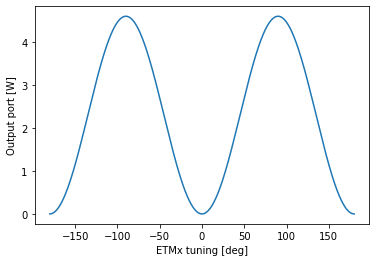

In [4]:
base.parse(Mich)
kat = base.deepcopy()
kat.parse(""" xaxis ETMx phi lin -180 180 800""")
out1=kat.run()
plt.plot(out1.x,out1['pow_out'],label="simple MI ")
plt.xlabel('ETMx tuning [deg]')
plt.ylabel('Output port [W]')

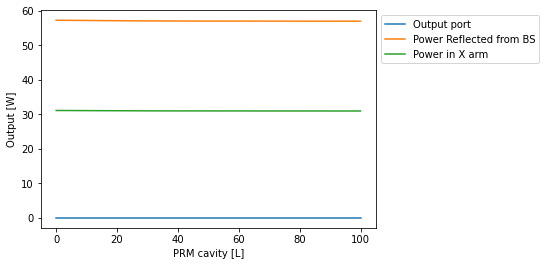

In [7]:
kat1=base.deepcopy()
kat1.PRMC.T=0.09
kat1.s2.L=3
kat1.PRMC.phi=90
kat1.parse(""" xaxis s2 L lin 0 100 800 """)
out1=kat1.run()
plt.plot(out1.x,out1['pow_out'],label="Output port")
plt.plot(out1.x,out1['prmc'],label="Power Reflected from BS")
plt.plot(out1.x,out1['armx'],label="Power in X arm")
plt.xlabel('PRM cavity [L]')
plt.ylabel('Output [W]')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()


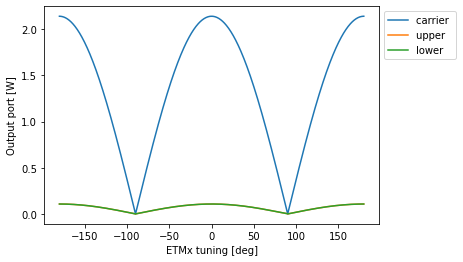

In [6]:
kat2 = kat1.deepcopy()
kat.parse(""" xaxis ETMx phi lin -180 180 800""")
out1=kat.run()
plt.plot(out1.x,out1['carrier'],label="carrier ")
plt.plot(out1.x,out1['upper'],label="upper ")
plt.plot(out1.x,out1['lower'],label="lower")
plt.xlabel('ETMx tuning [deg]')
plt.ylabel('Output port [W]')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

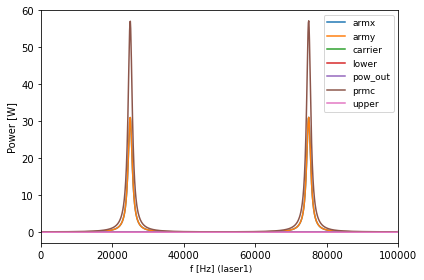

In [11]:
kat3 = kat2.deepcopy()
kat2.parse("xaxis laser1 f lin 0 100k 1000")
out3 = kat2.run()
fig = out3.plot(ylabel="Power [W]")